# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
df=pd.read_csv(r"C:\Users\Vicky\Downloads\avocado.csv~\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Import data from given link to predict Average Price of Avacado. 

# Exploratory Data Analysis

In [3]:
#checking shape of Data.
df.shape

(18249, 14)

In [4]:
#Droping Unnamed Column.
df.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
#Checking Data Types to get information about data.
df.dtypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


With above fucntion we are trying to get info about data like as Null Values, data types, total numbers of columns.

In [7]:
#Total numbers of features are there.
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

# Statistic Summary

In [8]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


The above Summary provide Statistical information about whole data i.e. Count, Mean, Standard Deviation, Minimum value, 25%, 50% 75% and Maximum Value and statistical report is mentioned above

In [9]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No Null Values are present.

# Ordinal Encoding: (Date)

In [10]:
df.sort_values(by=['Date'], inplace=True, ascending=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast,1,4
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago,1,4
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,1,4
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh,1,4
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise,1,4


In [13]:
#Deleting Date column after applying ordinal encoding.
df.drop('Date',axis=1, inplace=True)

In [14]:
pd.concat({'unique values': df.apply(pd.unique), 'number of unique values': df.nunique()}, axis=1)

,unique values,number of unique values
AveragePrice,"[1.75, 1.49, 1.68, 1.52, 1.64, 0.75, 0.85, 1.5...",259
Total Volume,"[27365.89, 17723.17, 2896.72, 54956.8, 1505.12...",18237
4046,"[9307.34, 1189.35, 161.68, 3013.04, 1.27, 4268...",17702
4225,"[3844.81, 15628.27, 206.96, 35456.88, 1129.5, ...",18103
4770,"[615.28, 0.0, 1561.7, 15267.89, 64225.78, 82.1...",12071
Total Bags,"[13598.46, 905.55, 2528.08, 14925.18, 374.35, ...",18097
Small Bags,"[13061.1, 905.55, 2528.08, 11264.8, 186.67, 16...",17321
Large Bags,"[537.36, 0.0, 3660.38, 187.68, 2811.54, 36981....",15082
XLarge Bags,"[0.0, 2950.53, 6.8, 1034.22, 6.16, 18672.81, 1...",5588
type,"[organic, conventional]",2


checking all columns unique value to indentify unique values.

<AxesSubplot:>

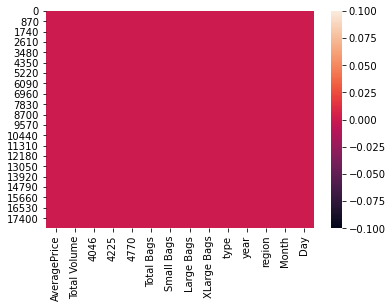

In [15]:
sns.heatmap(df.isnull())

With the help of heatmap trying to find Null Values. No null values are present.

# Correlation

<AxesSubplot:>

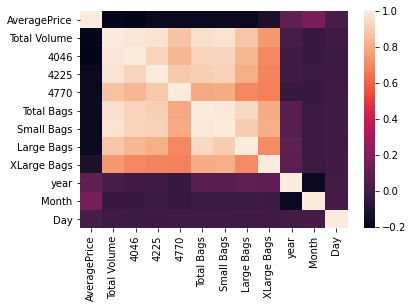

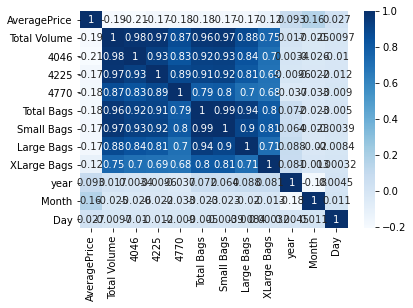

In [16]:
dfcor=df.corr()
dfcor
sns.heatmap(dfcor)
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [18]:
df.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

Grouping Total volume Year wise.

In [19]:
df.groupby('AveragePrice')['4046'].mean()

AveragePrice
0.44        223.840
0.46    1200632.860
0.48        717.570
0.49     369283.795
0.51     624146.334
           ...     
3.04        419.060
3.05       1043.830
3.12       5898.490
3.17       1255.550
3.25       2325.930
Name: 4046, Length: 259, dtype: float64

Grouping Average Price with 4046.

In [20]:
#Grouping AveragePrice and Total Bags.
df.groupby('AveragePrice')['Total Bags'].mean()

AveragePrice
0.44     59084.320
0.46    450365.830
0.48     46034.320
0.49     70095.180
0.51     94623.868
           ...    
3.04      7240.270
3.05       947.070
3.12      3105.970
3.17      1680.700
3.25      3232.160
Name: Total Bags, Length: 259, dtype: float64

In [21]:
#Grouping AVeragePrice and Samll Bags.
df.groupby('AveragePrice')['Small Bags'].mean()

AveragePrice
0.44       638.68
0.46    113752.17
0.48      1385.06
0.49     35674.51
0.51     36911.05
          ...    
3.04      6960.97
3.05       926.67
3.12      3079.30
3.17      1542.22
3.25      3232.16
Name: Small Bags, Length: 259, dtype: float64

In [22]:
#Grouping Average Price and large Bags.
df.groupby('AveragePrice')['Large Bags'].mean()

AveragePrice
0.44     58445.640
0.46    330583.100
0.48     44649.260
0.49     34420.670
0.51     57712.818
           ...    
3.04       279.300
3.05        20.400
3.12        26.670
3.17       138.480
3.25         0.000
Name: Large Bags, Length: 259, dtype: float64

In [23]:
#Grouping AveragePrice and Xlarge Bags.
df.groupby('AveragePrice')['XLarge Bags'].mean()

AveragePrice
0.44       0.00
0.46    6030.56
0.48       0.00
0.49       0.00
0.51       0.00
         ...   
3.04       0.00
3.05       0.00
3.12       0.00
3.17       0.00
3.25       0.00
Name: XLarge Bags, Length: 259, dtype: float64

In [24]:
#Grouping AveragePrice and Year.
df.groupby('AveragePrice')['year'].mean()

AveragePrice
0.44    2017.0
0.46    2017.0
0.48    2017.0
0.49    2016.0
0.51    2016.4
         ...  
3.04    2017.0
3.05    2017.0
3.12    2016.0
3.17    2017.0
3.25    2016.0
Name: year, Length: 259, dtype: float64

In [25]:
#Grouping AveragePrice and Month.
df.groupby('AveragePrice')['Month'].mean()

AveragePrice
0.44     3.0
0.46     2.0
0.48     3.0
0.49     7.0
0.51     2.6
        ... 
3.04     8.0
3.05     3.0
3.12    11.0
3.17     4.0
3.25    10.0
Name: Month, Length: 259, dtype: float64

# Data Visualization

# Univariate Analysis

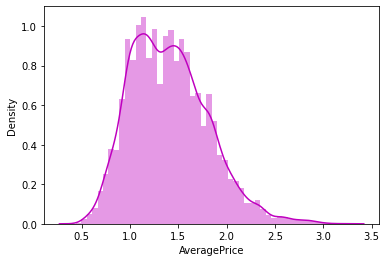

In [27]:
sns.distplot(df.AveragePrice, color = "m")
plt.show()

The data normally Distributed in AveragePrice.

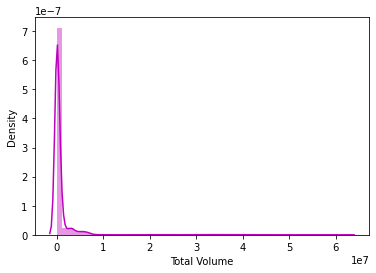

In [28]:
sns.distplot(df['Total Volume'], color = "m")
plt.show()

the data not normally distributed in Total volume. From Starting it is increasing 0 to 1 after decreasing and paralel to 0.

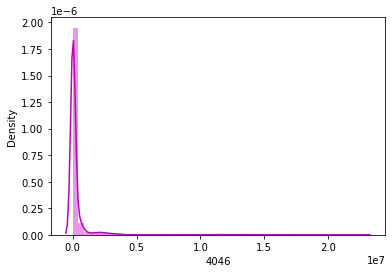

In [29]:
sns.distplot(df['4046'], color = "m")
plt.show()

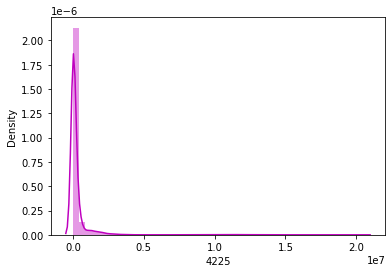

In [30]:
sns.distplot(df['4225'], color = "m")
plt.show()

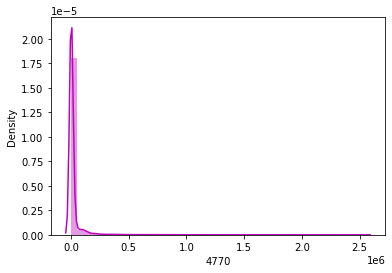

In [31]:
sns.distplot(df['4770'], color = "m")
plt.show()

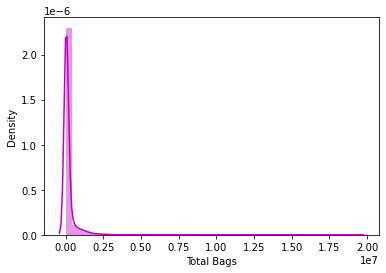

In [32]:
sns.distplot(df['Total Bags'], color = "m")
plt.show()

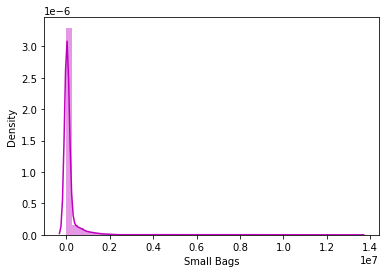

In [33]:
sns.distplot(df['Small Bags'], color = "m")
plt.show()

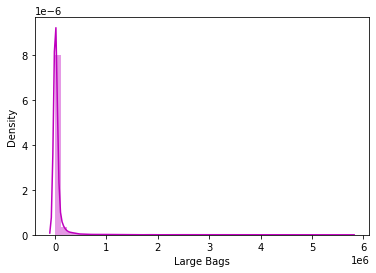

In [34]:
sns.distplot(df['Large Bags'], color = "m")
plt.show()

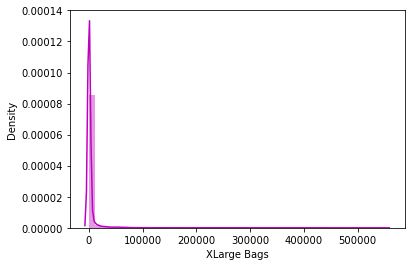

In [35]:
sns.distplot(df['XLarge Bags'], color = "m")
plt.show()

Above distplot the data is not normally distributed and there is high variation between values.

Text(0.5, 1.0, 'Average Price')

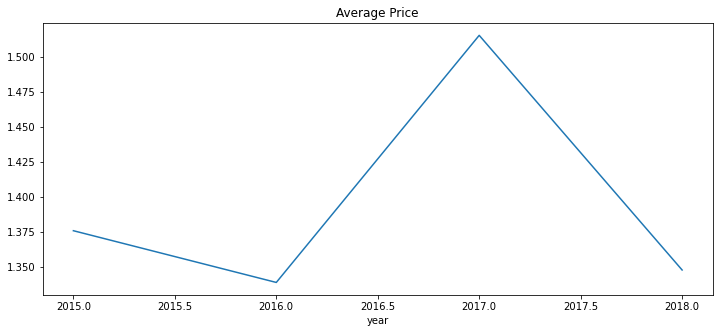

In [36]:
dategroup = df.groupby('year').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=df.year)
plt.title('Average Price')

Relating Average Price with Year to check how price changing.

Text(0.5, 1.0, 'Average Price')

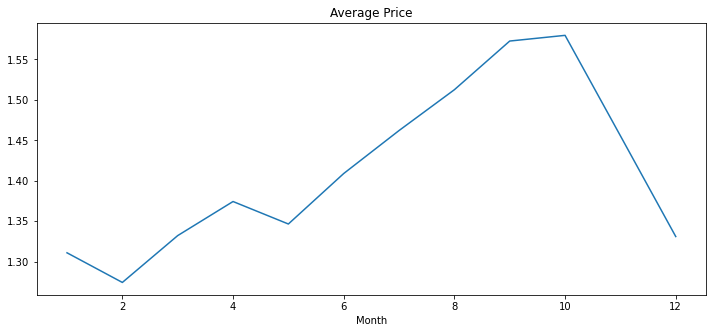

In [37]:
dategroup = df.groupby('Month').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=df.Month)
plt.title('Average Price')

In the starting of the year the price is decreasing the after feb it is increasing upto October and after decreasing.

Text(0.5, 1.0, 'Average Price')

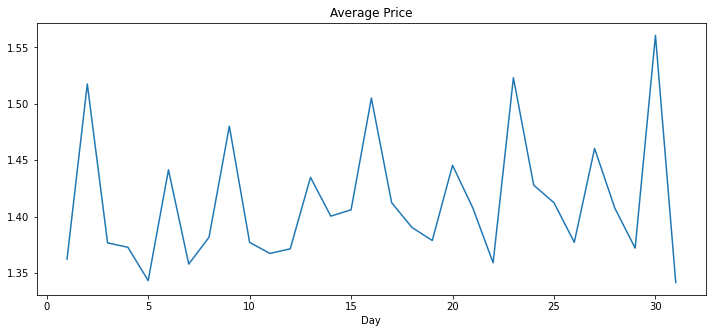

In [38]:
dategroup = df.groupby('Day').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=df.Day)
plt.title('Average Price')

If we check average price  date wise so there are high variation is present. 

# Bivariate Analysis

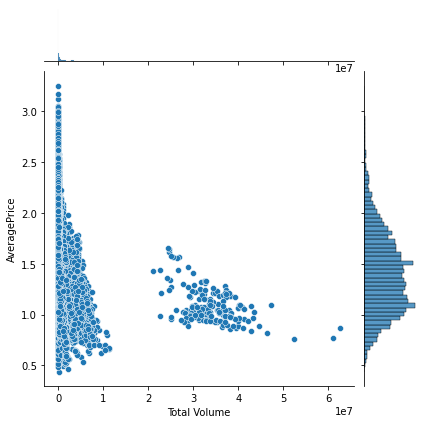

In [41]:
sns.jointplot(x='Total Volume',y='AveragePrice',data=df)

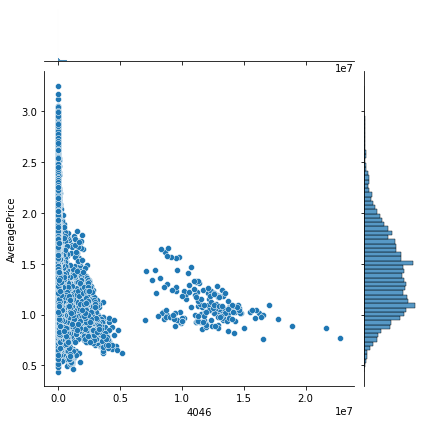

In [42]:
sns.jointplot(x='4046',y='AveragePrice',data=df)

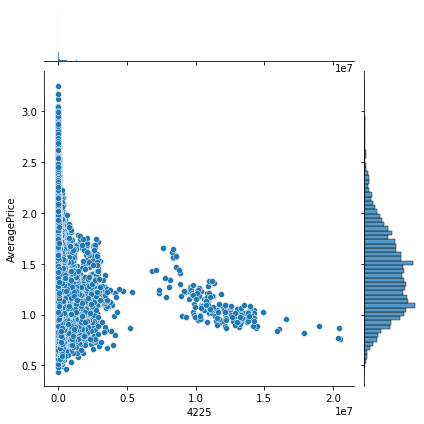

In [43]:
sns.jointplot(x='4225',y='AveragePrice',data=df)

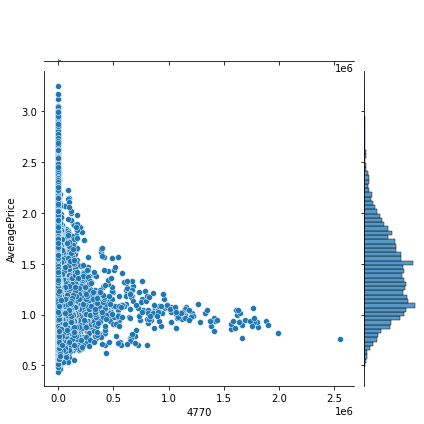

In [44]:
sns.jointplot(x='4770',y='AveragePrice',data=df)

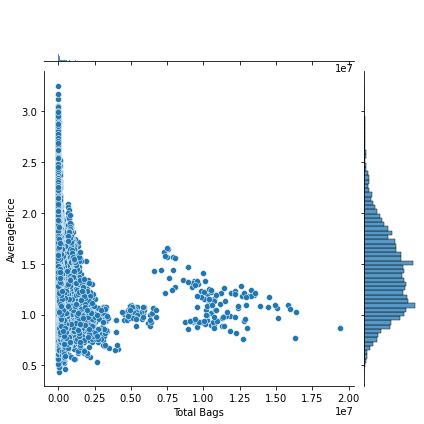

In [45]:
sns.jointplot(x='Total Bags',y='AveragePrice',data=df)

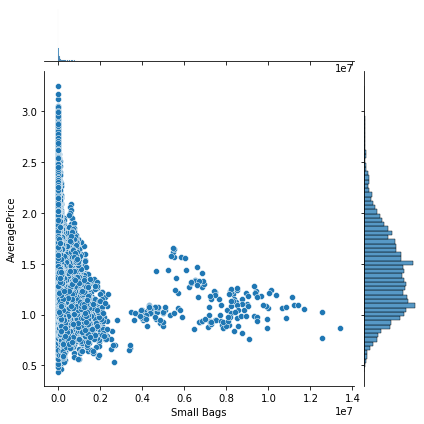

In [47]:
sns.jointplot(x='Small Bags',y='AveragePrice',data=df)

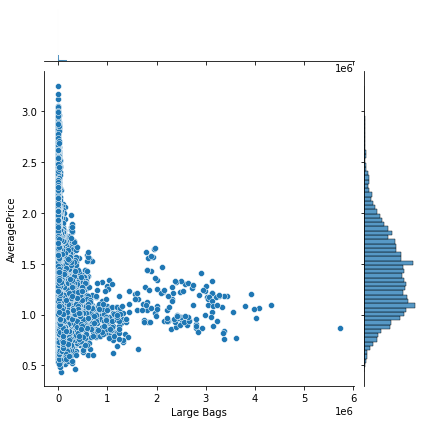

In [48]:
sns.jointplot(x='Large Bags',y='AveragePrice',data=df)

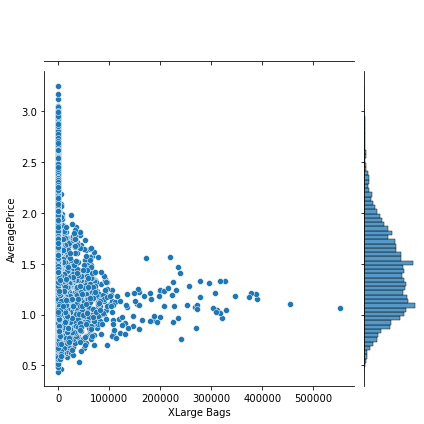

In [49]:
sns.jointplot(x='XLarge Bags',y='AveragePrice',data=df)

# Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['type'] = labelencoder.fit_transform(df['type'])
df['region'] = labelencoder.fit_transform(df['region'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,1,2015,46,1,4
1,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,1,2015,8,1,4
2,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,1,2015,16,1,4
3,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,0,2015,34,1,4
4,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,1,2015,3,1,4


In [54]:
#checking unique values in region column.
df['region'].unique()

array([46,  8, 16, 34,  3, 53, 22, 21,  1, 11, 24, 35, 48, 49, 25, 40,  4,
        7, 47,  0, 18, 44, 42, 51, 37,  5, 30, 14, 12, 41,  2, 39, 38, 29,
       45, 15, 23, 43,  9, 28, 27, 19, 20, 10, 13, 32, 33, 26, 36, 17, 50,
       31, 52,  6])

# Multivariate Analysis

In [55]:
collist=df.columns.values
ncol=7
nrows=4

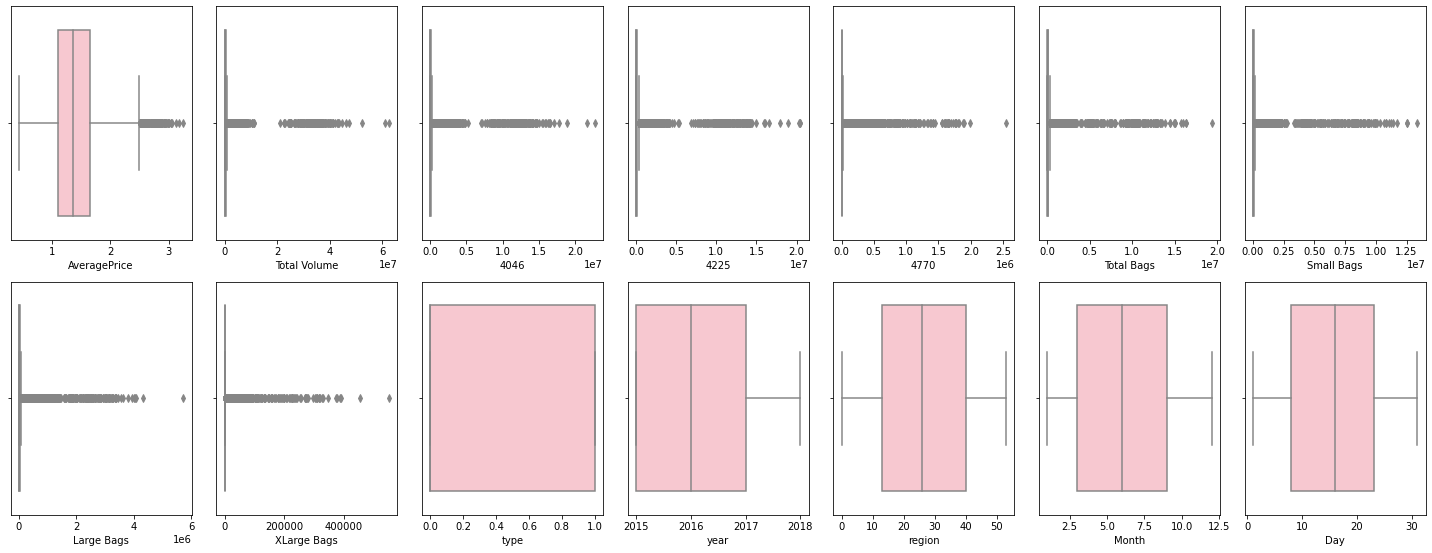

In [56]:
plt.figure(figsize=(20,15))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Pink', orient='v')
    plt.tight_layout()

In [57]:
sns.pairplot(df)

# Zscore Value

In [58]:
from scipy.stats import zscore

In [59]:
z=np.abs(zscore(df))
z

array([[0.85436068, 0.2383929 , 0.22427771, ..., 1.25161424, 1.46495942,
        1.32891496],
       [0.20866348, 0.2411851 , 0.23069533, ..., 1.18688412, 1.46495942,
        1.32891496],
       [0.68051913, 0.24547832, 0.23150774, ..., 0.67351605, 1.46495942,
        1.32891496],
       ...,
       [0.03482193, 0.19897412, 0.20850959, ..., 1.18744323, 0.89903378,
        1.06396367],
       [0.73018814, 0.19122515, 0.20820065, ..., 1.31522614, 0.89903378,
        1.06396367],
       [0.16385413, 0.26759691, 0.18111518, ..., 0.09653607, 0.89903378,
        1.06396367]])

Applying Zscore on entire data.

In [60]:
threshold=3
print(np.where(z>3))

(array([   26,    26,    26, ..., 18245, 18245, 18245], dtype=int64), array([1, 2, 3, ..., 5, 6, 8], dtype=int64))


Puting threshold value

In [61]:
xd=df[(z<3).all(axis=1)]
xd

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,1,2015,46,1,4
1,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,1,2015,8,1,4
2,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,1,2015,16,1,4
3,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,0,2015,34,1,4
4,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,1,2015,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,1.74,38441.23,27.25,2031.54,0.00,36382.44,29466.95,6915.49,0.00,1,2018,4,3,25
18244,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,0,2018,8,3,25
18246,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,1,2018,45,3,25
18247,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,1,2018,6,3,25


Here all values that below threshold point(3).

In [62]:
#Checking Old data shape.
df.shape

(18249, 14)

In [63]:
#New data shape after Zscore.
xd.shape

(17651, 14)

In [64]:
(598/18249)*100

3.276891884486821

Loosing 3.2% data after applying Zscore functionality but it is ok, as we are not loosing much data.

# Spliting the Dependent and Target Variables.

In [65]:
x=xd.drop('AveragePrice',axis=1)
y=xd['AveragePrice']

In [66]:
x.shape

(17651, 13)

In [67]:
y.shape

(17651,)

# Data Scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dx=sc.fit_transform(x)
dx=pd.DataFrame(dx,columns=x.columns)
dx

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0.003262,2.277940e-03,0.000987,0.001786,0.004887,0.005561,0.000688,0.000000,1.0,0.0,0.867925,0.000000,0.1
1,0.002109,2.910894e-04,0.004013,0.000000,0.000325,0.000386,0.000000,0.000000,1.0,0.0,0.150943,0.000000,0.1
2,0.000336,3.957063e-05,0.000053,0.000000,0.000908,0.001076,0.000000,0.000000,1.0,0.0,0.301887,0.000000,0.1
3,0.006562,7.374313e-04,0.009104,0.004533,0.005364,0.004796,0.004684,0.000000,0.0,0.0,0.641509,0.000000,0.1
4,0.000170,3.108282e-07,0.000290,0.000000,0.000135,0.000079,0.000240,0.000000,1.0,0.0,0.056604,0.000000,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.004587,6.669345e-06,0.000522,0.000000,0.013074,0.012545,0.008850,0.000000,1.0,1.0,0.075472,0.181818,0.8
17647,0.108595,3.492070e-02,0.118911,0.507929,0.045786,0.044098,0.028751,0.024358,0.0,1.0,0.150943,0.181818,0.8
17648,0.019541,7.159645e-03,0.001304,0.000000,0.046416,0.046428,0.025736,0.000000,1.0,1.0,0.849057,0.181818,0.8
17649,0.022741,7.255290e-03,0.018225,0.000000,0.032210,0.038071,0.000265,0.000000,1.0,1.0,0.113208,0.181818,0.8


In [69]:
X=dx

# Finding best Random State for train test split.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state = i)
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predf = LR.predict(X_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.47543678445038495  on Random State  711


# Spliting X and y into Train data and Test data for model building.

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=711)

In [72]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(14120, 13) (14120,) (3531, 13) (3531,)


# LinearRegression

In [73]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [74]:
LR.coef_

array([-3.13730083e+02,  1.52822887e+02,  1.46616089e+02,  1.28039901e+01,
       -6.39009884e+04,  5.40260542e+04,  1.79736949e+04,  1.28690582e+03,
        4.45664386e-01,  1.59455937e-01,  1.97788109e-02,  2.10739853e-01,
        3.28847690e-02])

In [75]:
LR.score(X_train,y_train)

0.43442219385890846

In [76]:
pred=LR.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [1.486355   1.64910016 1.27707889 ... 1.19774827 1.00344497 1.06505699]
error:
Mean absolute error: 0.2191127344632578
Mean squared error: 0.07887008239064806
Root Mean Squared error: 0.28083817829961805
0.47543678445038495


# RandomForestRegressor

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
predrf=rf.predict(X_test)
print('Predicted Result Price:',predrf)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,predrf)))
print(r2_score(y_test,predrf))

Predicted Result Price: [1.7377 1.3775 1.772  ... 0.9773 1.0607 1.0078]
error:
Mean absolute error: 0.08948745397904279
Mean squared error: 0.016061043234211276
Root Mean Squared error: 0.1267321712676433
0.8931783481309227


# DecisionTreeRegressor

In [78]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
pred=dtc.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [1.74 1.41 1.88 ... 0.97 0.92 0.98]
error:
Mean absolute error: 0.11918436703483432
Mean squared error: 0.03332217502124044
Root Mean Squared error: 0.1825436249810999
0.778374933201267


# AdaBoostRegressor

In [79]:
from sklearn.ensemble import AdaBoostRegressor
ad=RandomForestRegressor(n_estimators=100)
ad.fit(X_train,y_train)
ad.score(X_train,y_train)
pred=ad.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [1.7414 1.3783 1.7698 ... 0.9898 1.0966 1.0051]
error:
Mean absolute error: 0.08947391673746813
Mean squared error: 0.016145097541772867
Root Mean Squared error: 0.12706336034346355
0.8926193047456639


# SVR

In [80]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
svr.score(X_train,y_train)
pred=svr.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [1.61776578 1.56984072 1.48483526 ... 1.10571333 1.06795342 1.02541394]
error:
Mean absolute error: 0.17747515395871513
Mean squared error: 0.0577583924237336
Root Mean Squared error: 0.24032975767418732
0.6158501787191899


# KNeighborsRegressor

In [81]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
pred=knn.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [1.634 1.836 1.796 ... 1.102 0.986 1.228]
error:
Mean absolute error: 0.18652902860379497
Mean squared error: 0.06503325630133107
Root Mean Squared error: 0.25501618831229333
0.5674652160990575


# Checking Cross Validation to remove over fiting and under fiting cases


In [82]:
from sklearn.model_selection import cross_val_score
LR=cross_val_score(LR,X,y,cv=5)
print("Cross Validation Score of Linear Regression Model:", LR.mean())

Cross Validation Score of Linear Regression Model: 0.345991956599486


In [83]:
RFR=cross_val_score(rf,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", RFR.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.5787979998579293


In [84]:
DTC=cross_val_score(dtc,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", DTC.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.3682551186894788


In [85]:
AD=cross_val_score(ad,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", AD.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.5828449004234223


In [86]:
SVR=cross_val_score(svr,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", SVR.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.4343181184274224


In [87]:
KNN=cross_val_score(knn,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", KNN.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.439044250689388


# Hyper parameter tuning

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42)
parameters = {'bootstrap': [True],'criterion': ['mse'],'max_depth':[None],'n_estimators':[10], 'random_state':[42]}

grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.8532249854609126
Residual sum of squares: 0.02


# Prediction/Evaluation

In [95]:
import numpy as np
a = np.array(y_test)
predicted = np.array(predrf)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,1.76,1.7377
1,1.42,1.3775
2,2.00,1.7720
3,1.49,1.5914
4,1.10,1.0959
...,...,...
3526,1.91,1.9995
3527,1.20,1.2347
3528,0.97,0.9773
3529,0.97,1.0607


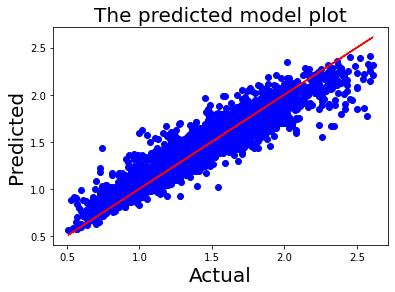

In [97]:
plt.scatter(x=y_test, y=predrf, color = "blue")
plt.plot(y_test,y_test, color='r')
plt.xlabel("Actual", fontsize =20)
plt.ylabel("Predicted", fontsize=20)
plt.title("The predicted model plot", fontsize=20)
plt.show()

In [ ]:
import joblib
joblib.dump(rf,'Avacado_Project.obj')